<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
!gdown --id 1Lfz8YlLk2GfccynPdilI49O6kQYRhEI0

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Lfz8YlLk2GfccynPdilI49O6kQYRhEI0
To: /content/Anomaly.xlsx
100% 30.6k/30.6k [00:00<00:00, 49.9MB/s]


## From Scratch

In [17]:
df = pd.read_excel("Anomaly.xlsx", sheet_name="X", header=None)
df.head()

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


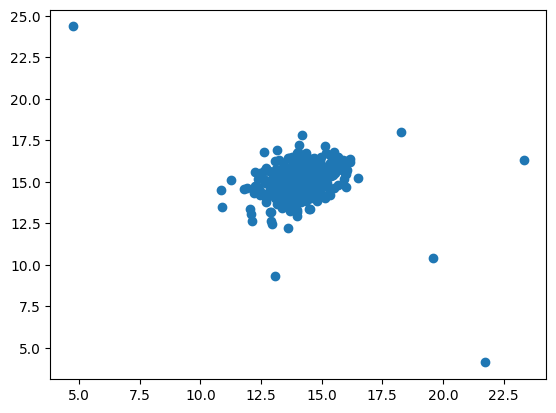

In [18]:
plt.figure()
plt.scatter(df[0], df[1])
plt.show()

In [19]:
df.describe()

,0,1
count,307.000000,307.000000
mean,14.112226,14.997711
std,1.355957,1.309707
min,4.752613,4.126232
25%,13.403351,14.361997
50%,14.059507,15.023113
75%,14.675503,15.654394
max,23.339868,24.350407


In [20]:
# Cgeck how many training examples are in this dataset
m = len(df)
print("Number of samples:", m)

Number of samples: 307


In [21]:
df.shape

(307, 2)

In [22]:
# Calculate the mean for each feature
s = np.sum(df, axis=0)
mu = s/m
mu

0    14.112226
1    14.997711
dtype: float64

In [23]:
# calculate the variance
vr = np.sum((df-mu)**2, axis=0)
variance = vr/m
variance

0    1.832631
1    1.709745
dtype: float64

In [24]:
# make the variance diagonal shaped
var_dia = np.diag(variance)
var_dia

array([[1.83263141, 0.        ],
       [0.        , 1.70974533]])

In [25]:
# Calculate the probability
kn = len(mu)
X = df - mu
p = 1/((2*np.pi)**(kn/2)*(np.linalg.det(var_dia)**0.5)) * np.exp(-0.5*np.sum(X @ np.linalg.pinv(var_dia) * X, axis=1))
p

0      6.470829e-02
1      5.030417e-02
2      7.245035e-02
3      5.031575e-02
4      6.368497e-02
           ...     
302    3.981340e-02
303    5.455673e-08
304    4.461721e-12
305    6.107184e-05
306    2.912867e-23
Length: 307, dtype: float64

In [27]:
# Let's put all these calculations for probability into a function for future use.
def probability(df):
  s = np.sum(df, axis=0)
  m = len(df)
  mu = s/m
  vr = np.sum((df-mu)**2, axis=0)
  variance = vr/m
  var_dia = np.diag(variance)
  n = len(mu)
  X = df - mu
  p = 1/((2*np.pi)**(n/2)*(np.linalg.det(var_dia)**0.5)) * np.exp(-0.5*np.sum(X @ np.linalg.pinv(var_dia) * X, axis=1))
  return p

## import val-set

In [26]:
cvx = pd.read_excel("Anomaly.xlsx", sheet_name="Xval", header=None)
cvx.head()

,0,1
0,15.790260,14.921024
1,13.639619,15.329955
2,14.865899,16.473865
3,13.584676,13.989306
4,13.464042,15.635330


In [28]:
cvy = pd.read_excel("Anomaly.xlsx", sheet_name="y", header=None)
cvy.head()

,0
0,0
1,0
2,0
3,0
4,0


In [30]:
p1 = probability(cvx)
y = np.array(cvy)

In [33]:
p1

0      4.201833e-02
1      7.445703e-02
2      3.618254e-02
3      5.403226e-02
4      6.629210e-02
           ...     
302    1.800521e-30
303    9.046525e-26
304    3.289709e-05
305    4.409436e-11
306    1.452964e-04
Length: 307, dtype: float64

In [34]:
p1.shape

(307,)

In [31]:
p1.describe()

count    3.070000e+02
mean     5.378568e-02
std      1.928081e-02
min      1.800521e-30
25%      4.212979e-02
50%      5.935014e-02
75%      6.924909e-02
max      7.864731e-02
dtype: float64

In [32]:
def tpfpfn(ep, p):
  tp, fp, fn = 0, 0, 0
  for i in range(len(y)):
    if p[i] <= ep and y[i][0] == 1:
      tp += 1
    elif p[i] <= ep and y[i][0] == 0:
      fp += 1
    elif p[i] > ep and y[i][0] == 1:
      fn += 1
  return tp, fp, fn

In [35]:
eps = [i for i in p1 if i <= p1.mean()]
len(eps)

128

In [36]:
# Define a function to calculate the 'f1' score
def f1(ep, p):
  tp, fp, fn = tpfpfn(ep, p1)
  prec = tp / (tp + fp)
  rec = tp / (tp + fn)
  f1 = 2 * prec * rec / (prec + rec)
  return f1

In [37]:
f = []
for i in eps:
  f.append(f1(i, p1))

In [42]:
len(f)

128

In [41]:
f

[0.16470588235294117,
 0.208955223880597,
 0.15384615384615385,
 0.3181818181818182,
 0.15555555555555556,
 0.125,
 0.56,
 0.13333333333333333,
 0.16867469879518074,
 0.12612612612612614,
 0.14583333333333331,
 0.22950819672131148,
 0.15053763440860213,
 0.16666666666666666,
 0.3888888888888889,
 0.12389380530973451,
 0.10294117647058823,
 0.19999999999999998,
 0.25925925925925924,
 0.1372549019607843,
 0.17283950617283952,
 0.13592233009708737,
 0.10370370370370369,
 0.17073170731707316,
 0.18918918918918923,
 0.27999999999999997,
 0.12844036697247707,
 0.23333333333333334,
 0.15909090909090906,
 0.10852713178294573,
 0.5833333333333334,
 0.1044776119402985,
 0.25,
 0.1473684210526316,
 0.12173913043478261,
 0.13861386138613863,
 0.10769230769230768,
 0.18666666666666665,
 0.11023622047244096,
 0.24137931034482757,
 0.2121212121212121,
 0.12068965517241378,
 0.3333333333333333,
 0.30434782608695654,
 0.14285714285714285,
 0.17721518987341772,
 0.5185185185185185,
 0.7368421052631577,


In [43]:
np.array(f).argmax()

127

In [44]:
# And now use this index to get the threshold probability
e = eps[127]
e

0.00014529639061630243

In [45]:
# Fiind out the Anamolous Examples
label = []
for i in range(len(df)):
  if p[i] <= e:
    label.append(1)
  else:
    label.append(0)

label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [46]:
df["label"] = np.array(label)
df.head()

,0,1,label
0,13.046815,14.741152,0
1,13.408520,13.763270,0
2,14.195915,15.853181,0
3,14.914701,16.174260,0
4,13.576700,14.042849,0


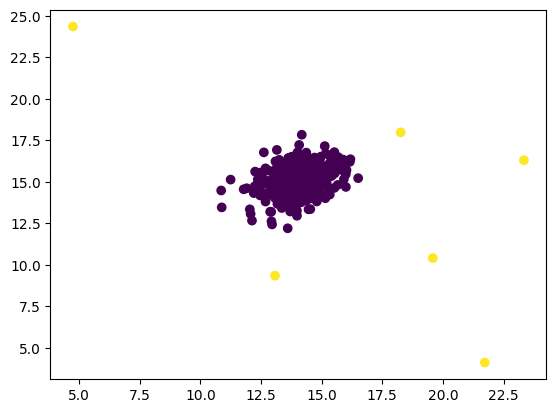

In [47]:
plt.figure()
plt.scatter(df[0], df[1], c=df["label"])
plt.show()